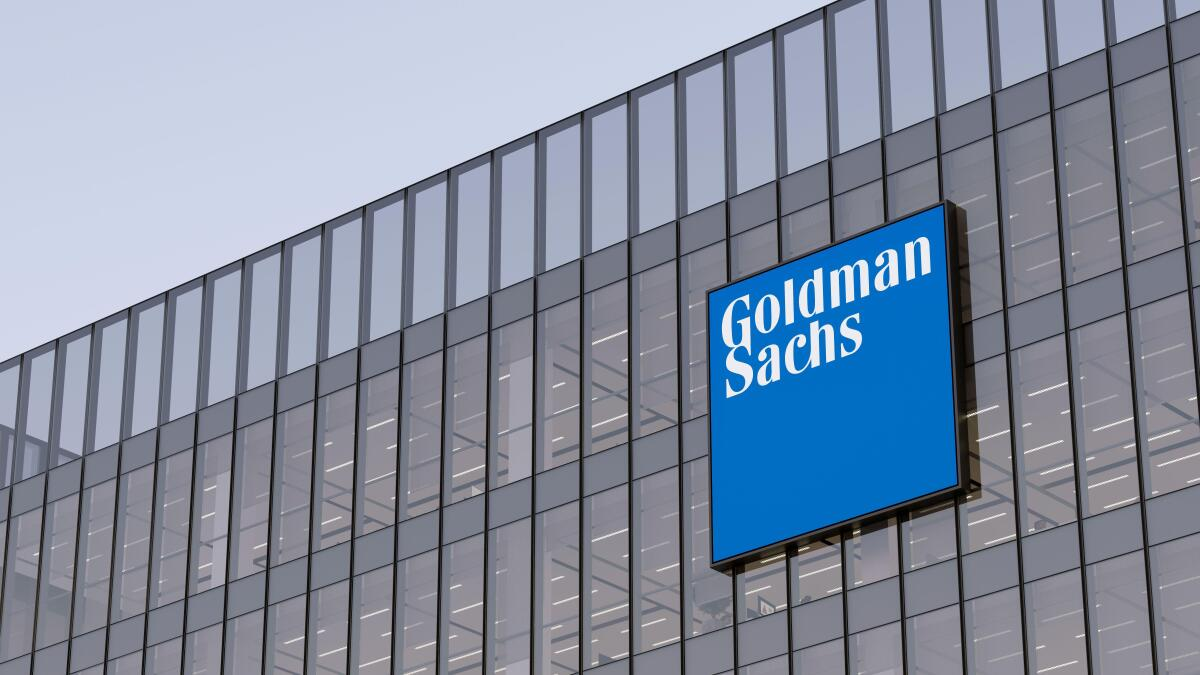

# About this Project

This Python script performs time series analysis and forecasting on the stock prices of Goldman Sachs (GS) using historical data from Yahoo Finance. The main steps are as follows:

1. **Data Retrieval and Visualization**:
   - Historical stock price data for Goldman Sachs from January 1, 2001, to the present is fetched using the `yfinance` library.
   - The closing price of the stock is plotted over time, showing how the stock price has evolved.

2. **Correlation Heatmap**:
   - A heatmap is generated to display the correlations between different features in the dataset (though here, it primarily reflects the correlation of the closing price with itself).

3. **Moving Averages**:
   - Two moving averages (50-day and 200-day) are computed and plotted along with the closing price to visualize trends and smoothing.

4. **Data Preparation for LSTM Model**:
   - The closing prices are normalized using `MinMaxScaler`.
   - A dataset is created with 60 time-steps for input features and the corresponding price for output.
   - The data is split into training and test sets.

5. **LSTM Model Building and Training**:
   - An LSTM model with two LSTM layers and dropout is built to predict stock prices.
   - The model is compiled and trained over 50 epochs with a batch size of 32.
   - The training history is recorded for later evaluation.

6. **Prediction and Visualization**:
   - The model's predictions are compared with actual stock prices.
   - The predicted stock prices and real stock prices are plotted to visualize the model’s performance.
   - Training and validation loss are plotted to evaluate the model's performance over epochs.

7. **Distribution of Returns**:
   - The daily returns of the stock are calculated and visualized with a histogram and kernel density estimate (KDE) to analyze the distribution of returns.

The script provides insights into the stock’s historical performance, visualizes trends and moving averages, trains an LSTM model for forecasting, and evaluates the model’s performance through various plots.

### Importing necessary libraries

In [17]:
#Expand for code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

### Fetching data from Yahoo Finance

In [18]:
#Expand for code
ticker = 'GS'
start_date = '2001-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


### Some basic Information of dataset

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,104.3750,105.5000,97.500,100.250,72.214951,3202400
2001-01-03,100.0625,115.5000,98.875,115.500,83.200272,7355200
2001-01-04,113.7500,116.7500,111.000,112.750,81.219330,5867200
2001-01-05,109.0000,111.0000,105.750,107.875,77.707634,4328600
2001-01-08,106.5000,107.3125,102.625,106.375,76.627098,2169500


In [20]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-24,489.260010,495.989990,485.820007,486.700012,486.700012,1598600
2024-07-25,486.049988,496.109985,483.230011,491.709991,491.709991,1489700
2024-07-26,495.720001,504.000000,495.649994,499.029999,499.029999,2249700
2024-07-29,500.420013,502.000000,491.059998,492.720001,492.720001,1599500
2024-07-30,498.309998,509.470001,498.299988,505.670013,505.670013,2641700


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5930 entries, 2001-01-02 to 2024-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5930 non-null   float64
 1   High       5930 non-null   float64
 2   Low        5930 non-null   float64
 3   Close      5930 non-null   float64
 4   Adj Close  5930 non-null   float64
 5   Volume     5930 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 324.3 KB


In [22]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5930.000000,5930.000000,5930.000000,5930.000000,5930.000000,5.930000e+03
mean,185.327991,187.450422,183.216901,185.362226,157.998021,5.237769e+06
std,88.700463,89.495431,87.983879,88.748054,91.049842,5.976866e+06
min,54.000000,54.540001,47.410000,52.000000,39.992207,4.601000e+05
25%,113.742498,115.327503,111.924999,113.507500,86.965622,2.488050e+06
50%,167.500000,169.289993,165.904999,167.600006,135.329636,3.499550e+06
75%,222.637497,224.799999,220.410004,222.485004,191.114899,5.498375e+06
max,503.000000,509.480011,499.429993,505.670013,505.670013,1.145907e+08


In [23]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no null values because Off Days (weekend) are already excluded. 

### Ploting the closing price

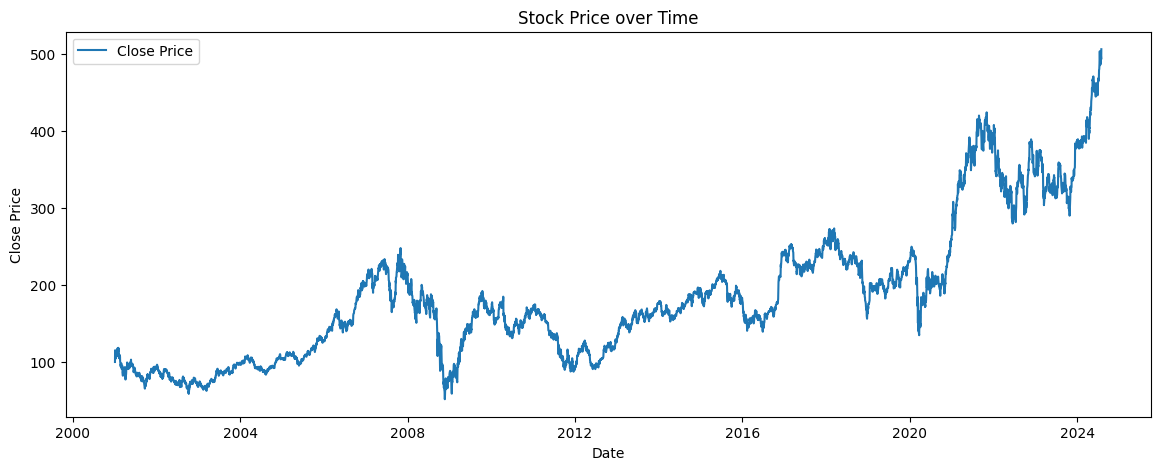

In [24]:
#Expand for code
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price over Time')
plt.legend()
plt.show()

### Correlation heatmap

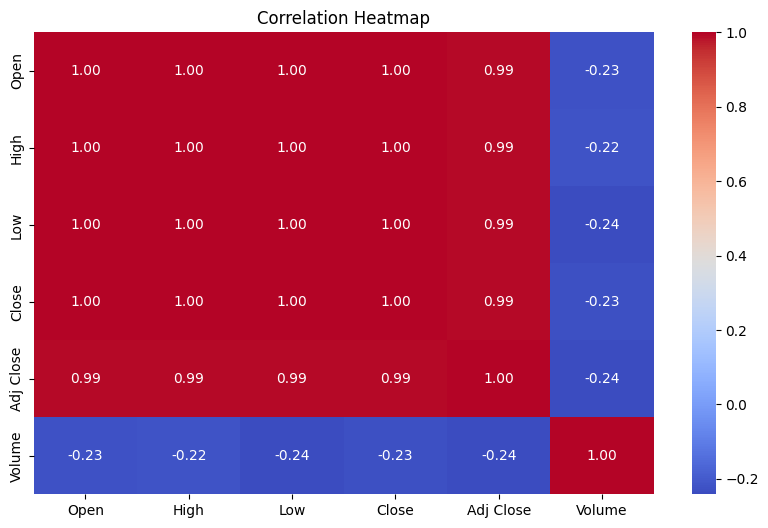

In [25]:
#Expand for code
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Moving Average 50, 200

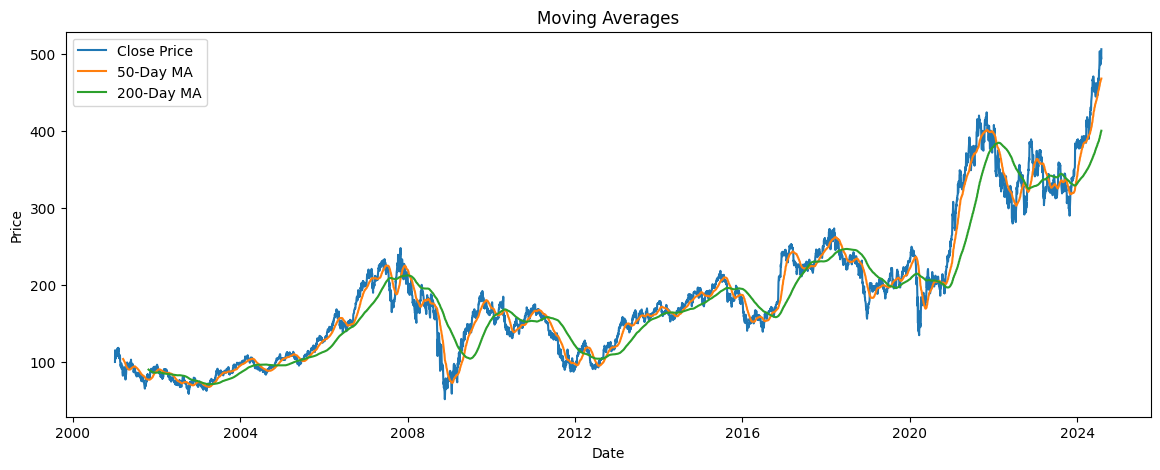

In [26]:
#Expand for code
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['MA50'], label='50-Day MA')
plt.plot(data.index, data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.show()

### Preparing the data for LSTM model

In [12]:
#Expand for code

# Select the closing price and reshape it
close_price = data['Close'].values
close_price = close_price.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_price = scaler.fit_transform(close_price)

# Create a data structure with 60 time-steps and 1 output
time_step = 60
X, y = [], []
for i in range(time_step, len(scaled_close_price)):
    X.append(scaled_close_price[i-time_step:i, 0])
    y.append(scaled_close_price[i, 0])
X, y = np.array(X), np.array(y)

# Reshape X to be [samples, time-steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

### Building the LSTM model

In [13]:
#Expand for code
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\Iqra Afzal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#Expand for code

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict the stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0085 - val_loss: 9.5827e-04
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 6.4190e-04 - val_loss: 0.0011
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 5.7559e-04 - val_loss: 0.0013
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 4.8208e-04 - val_loss: 7.5537e-04
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 4.7058e-04 - val_loss: 0.0044
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 4.5827e-04 - val_loss: 0.0014
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 4.1677e-04 - val_loss: 8.9390e-04
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 4.0757e-04 - val_loss: 8.0682e-04
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 3.6118e-04 - val_loss: 8.5982e-04
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 3.3865e-04 - val_loss: 6.4526e-04
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 2.9267

### Visualizing the results

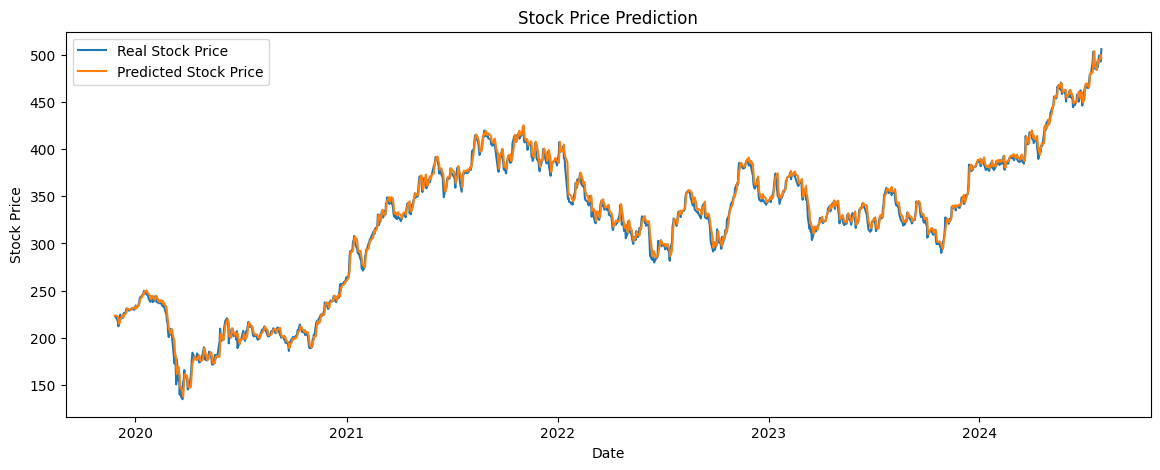

In [27]:
#Expand for code
plt.figure(figsize=(14, 5))
plt.plot(data.index[len(data)-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Real Stock Price')
plt.plot(data.index[len(data)-len(y_test):], predicted_stock_price, label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

### Ploting the training and validation loss

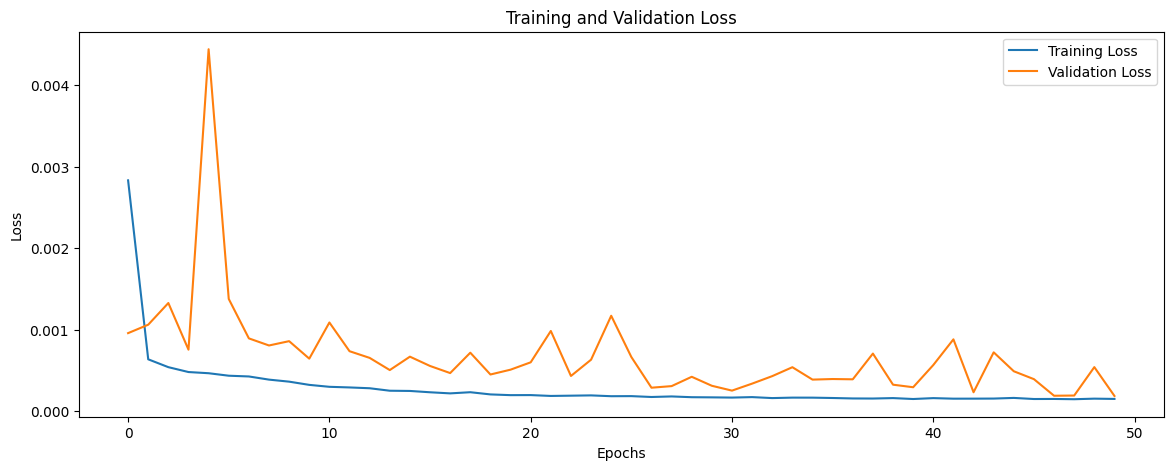

In [28]:
#Expand for code
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Distribution of Returns

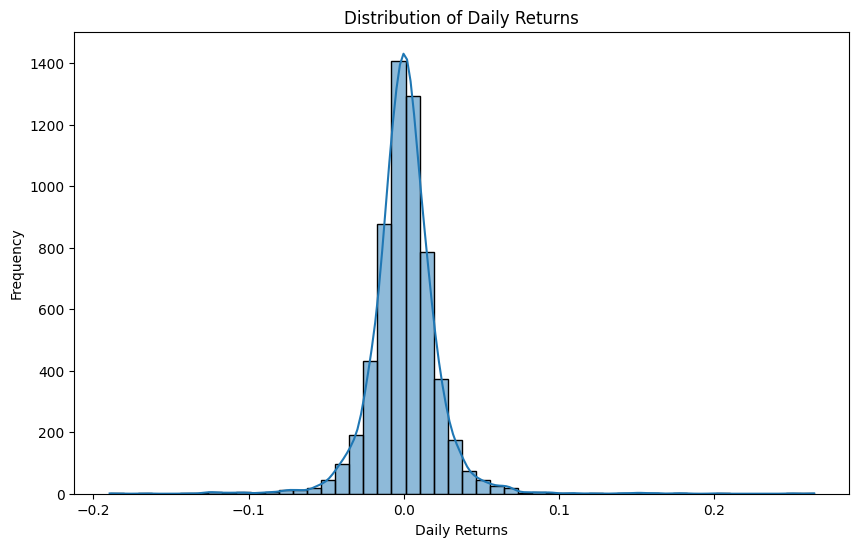

In [29]:
#Expand for code
returns = data['Close'].pct_change().dropna()
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

## Any Suggestion for improvement will be appriciated. Thanks